## Projet Statisque & Trace numérique - Pham Dong Pha - M2 D2SN

In [747]:
import pandas as pd 
import numpy as np

from wordcloud import WordCloud # for wordclouds
import re
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

In [748]:
df = pd.read_excel('C:/Users/phamd/Downloads/Jobs.xlsx')
df.head()

,Entreprise,Location,ID,Titre,Application,Date,Description,Niveau_experience,job_category,Type_poste,Industrie,job_apply_link,job_url,search_url
0,Davidson consulting,"Valbonne, Provence-Alpes-Côte d'Azur, France",2542453760,Consultant BI (H/F),Be among the first 25 applicants,2021-05-10,Je découvre les filiales \n\nRejoindre Davids...,Associate,Information Technology,Full-time,Computer Software | Internet | Staffing and Re...,http://www.experteer.fr/career/lp/signup_verti...,https://fr.linkedin.com/jobs/view/consultant-b...,https://www.linkedin.com/jobs/search/?geoId=10...
1,GrAI Matter Labs,"Paris, Île-de-France, France",2526303569,Application Engineer - Machine Learning,Be among the first 25 applicants,2021-04-05,"GrAI Matter Labs utilizes brain-inspired, neur...",Entry level,Engineering | Information Technology,Full-time,Information Technology and Services | Computer...,https://fr.jooble.org/external/718776688222822...,https://fr.linkedin.com/jobs/view/application-...,https://www.linkedin.com/jobs/search/?geoId=10...
2,Capgemini Engineering,Greater Toulouse Metropolitan Area,2486573814,Lead Data Scientist,Be among the first 25 applicants,2021-04-27,Notre offre\n\nTESSELLA est le World Class Cen...,Not Applicable,Engineering | Information Technology | Research,Full-time,Information Technology and Services,NaN,https://fr.linkedin.com/jobs/view/lead-data-sc...,https://www.linkedin.com/jobs/search/?geoId=10...
3,Faurecia,"Paris, Île-de-France, France",2522211414,Data Scientist,35 applicants,2021-05-06,Data Scientist (H/F) \n[CDI] \n\nNew trends a...,Not Applicable,Engineering | Information Technology,Full-time,Automotive,https://careers.faurecia.com/job/Paris-Data-Sc...,https://fr.linkedin.com/jobs/view/data-scienti...,https://www.linkedin.com/jobs/search/?geoId=10...
4,UNLCK,"Paris, Île-de-France, France",2553254896,Lead Data Scientist - Scoring - H/F,Be among the first 25 applicants,2021-05-17,Le poste \n\nPython / Sql / Tableau / Agile ...,Associate,Engineering | Information Technology,Full-time,Information Technology and Services | Computer...,https://fr.jooble.org/external/650202100594651...,https://fr.linkedin.com/jobs/view/lead-data-sc...,https://www.linkedin.com/jobs/search/?geoId=10...


In [749]:
df.drop(['job_apply_link', 'job_url', 'search_url'], axis=1, inplace=True)

In [750]:
df

,Entreprise,Location,ID,Titre,Application,Date,Description,Niveau_experience,job_category,Type_poste,Industrie
0,Davidson consulting,"Valbonne, Provence-Alpes-Côte d'Azur, France",2542453760,Consultant BI (H/F),Be among the first 25 applicants,2021-05-10,Je découvre les filiales \n\nRejoindre Davids...,Associate,Information Technology,Full-time,Computer Software | Internet | Staffing and Re...
1,GrAI Matter Labs,"Paris, Île-de-France, France",2526303569,Application Engineer - Machine Learning,Be among the first 25 applicants,2021-04-05,"GrAI Matter Labs utilizes brain-inspired, neur...",Entry level,Engineering | Information Technology,Full-time,Information Technology and Services | Computer...
2,Capgemini Engineering,Greater Toulouse Metropolitan Area,2486573814,Lead Data Scientist,Be among the first 25 applicants,2021-04-27,Notre offre\n\nTESSELLA est le World Class Cen...,Not Applicable,Engineering | Information Technology | Research,Full-time,Information Technology and Services
3,Faurecia,"Paris, Île-de-France, France",2522211414,Data Scientist,35 applicants,2021-05-06,Data Scientist (H/F) \n[CDI] \n\nNew trends a...,Not Applicable,Engineering | Information Technology,Full-time,Automotive
4,UNLCK,"Paris, Île-de-France, France",2553254896,Lead Data Scientist - Scoring - H/F,Be among the first 25 applicants,2021-05-17,Le poste \n\nPython / Sql / Tableau / Agile ...,Associate,Engineering | Information Technology,Full-time,Information Technology and Services | Computer...
...,...,...,...,...,...,...,...,...,...,...,...
988,ArianeGroup,"Issac, Nouvelle-Aquitaine, France",2553401439,Data scientist (H/F),Be among the first 25 applicants,2021-05-17,"Dans le cadre de sa campagne d'Alternance, Ari...",Entry level,Engineering | Information Technology,Full-time,Information Technology and Services | Computer...
989,Dataiku,"Paris, Île-de-France, France",2534553625,AI Governance Consultant,Be among the first 25 applicants,2021-05-12,Dataiku allows enterprises to create value wit...,Associate,Engineering | Information Technology,Full-time,Computer Software | Management Consulting | Ac...
990,Hermès,"Paris, Île-de-France, France",2507842647,Alternance - Data Scientist H/F,44 applicants,2021-04-27,"Mission Générale \n\nIdentifier, collecter, v...",Internship,Engineering | Information Technology,Full-time,Luxury Goods & Jewelry
991,Aix-Marseille University / CNRS,"Marseille, Provence-Alpes-Côte d'Azur, France",2495944259,PhD in Physics (M/F - 3 year contract): machin...,Be among the first 25 applicants,2021-04-09,Offer Description \n\nThis thesis is part of ...,Associate,Research | Analyst | Information Technology,Contract,Research | Oil & Energy | Biotechnology


In [751]:
df.columns.values

array(['Entreprise', 'Location', 'ID', 'Titre', 'Application', 'Date',
       'Description', 'Niveau_experience', 'job_category', 'Type_poste',
       'Industrie'], dtype=object)

In [752]:
#Vérifiez des "NaN" dans les données
df.isnull().sum()

Entreprise            0
Location              0
ID                    0
Titre                 0
Application           0
Date                  0
Description           0
Niveau_experience    15
job_category         15
Type_poste            0
Industrie            15
dtype: int64

In [753]:
df = df.dropna()
df

,Entreprise,Location,ID,Titre,Application,Date,Description,Niveau_experience,job_category,Type_poste,Industrie
0,Davidson consulting,"Valbonne, Provence-Alpes-Côte d'Azur, France",2542453760,Consultant BI (H/F),Be among the first 25 applicants,2021-05-10,Je découvre les filiales \n\nRejoindre Davids...,Associate,Information Technology,Full-time,Computer Software | Internet | Staffing and Re...
1,GrAI Matter Labs,"Paris, Île-de-France, France",2526303569,Application Engineer - Machine Learning,Be among the first 25 applicants,2021-04-05,"GrAI Matter Labs utilizes brain-inspired, neur...",Entry level,Engineering | Information Technology,Full-time,Information Technology and Services | Computer...
2,Capgemini Engineering,Greater Toulouse Metropolitan Area,2486573814,Lead Data Scientist,Be among the first 25 applicants,2021-04-27,Notre offre\n\nTESSELLA est le World Class Cen...,Not Applicable,Engineering | Information Technology | Research,Full-time,Information Technology and Services
3,Faurecia,"Paris, Île-de-France, France",2522211414,Data Scientist,35 applicants,2021-05-06,Data Scientist (H/F) \n[CDI] \n\nNew trends a...,Not Applicable,Engineering | Information Technology,Full-time,Automotive
4,UNLCK,"Paris, Île-de-France, France",2553254896,Lead Data Scientist - Scoring - H/F,Be among the first 25 applicants,2021-05-17,Le poste \n\nPython / Sql / Tableau / Agile ...,Associate,Engineering | Information Technology,Full-time,Information Technology and Services | Computer...
...,...,...,...,...,...,...,...,...,...,...,...
988,ArianeGroup,"Issac, Nouvelle-Aquitaine, France",2553401439,Data scientist (H/F),Be among the first 25 applicants,2021-05-17,"Dans le cadre de sa campagne d'Alternance, Ari...",Entry level,Engineering | Information Technology,Full-time,Information Technology and Services | Computer...
989,Dataiku,"Paris, Île-de-France, France",2534553625,AI Governance Consultant,Be among the first 25 applicants,2021-05-12,Dataiku allows enterprises to create value wit...,Associate,Engineering | Information Technology,Full-time,Computer Software | Management Consulting | Ac...
990,Hermès,"Paris, Île-de-France, France",2507842647,Alternance - Data Scientist H/F,44 applicants,2021-04-27,"Mission Générale \n\nIdentifier, collecter, v...",Internship,Engineering | Information Technology,Full-time,Luxury Goods & Jewelry
991,Aix-Marseille University / CNRS,"Marseille, Provence-Alpes-Côte d'Azur, France",2495944259,PhD in Physics (M/F - 3 year contract): machin...,Be among the first 25 applicants,2021-04-09,Offer Description \n\nThis thesis is part of ...,Associate,Research | Analyst | Information Technology,Contract,Research | Oil & Energy | Biotechnology


# Entreprise

In [754]:
# Nombre d'entreprise
df['Entreprise'].nunique()

312

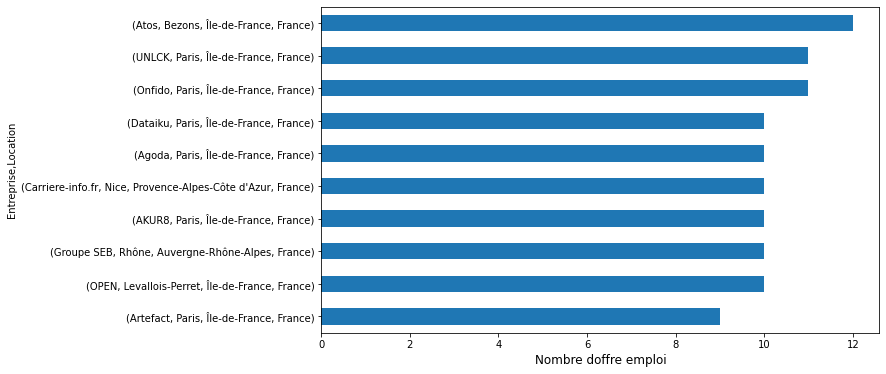

In [755]:
df.value_counts(["Entreprise", "Location"]).head(10).sort_values().plot.barh(figsize = (10,6))
plt.xlabel('Nombre doffre emploi', size = 12)
plt.title('', size = 20)
plt.show()

In [756]:
df.value_counts(["Entreprise"])

Entreprise                       
Atos                                 12
Freelance-info.fr                    11
Extia                                11
UNLCK                                11
Onfido                               11
                                     ..
Linkfluence - a Meltwater company     1
Emerton                               1
Elexent                               1
Easy Partner                          1
​Walter AG                            1
Length: 312, dtype: int64

# Location

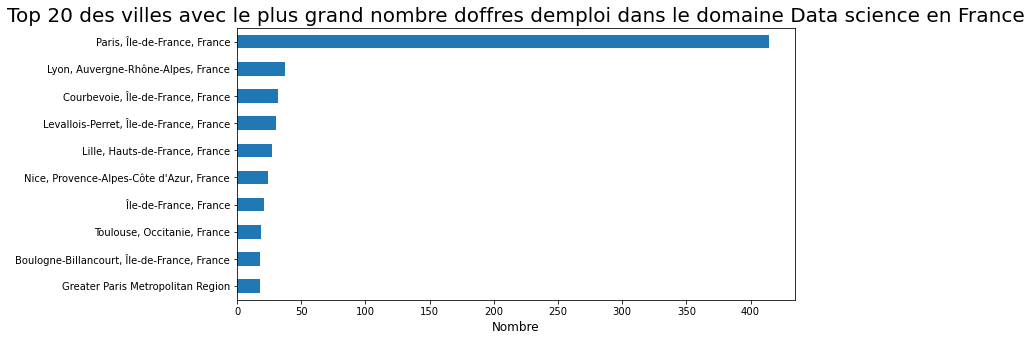

In [757]:
city = df.groupby(['Location']).count().sort_values('Titre').tail(10)

city['Titre'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Nombre', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Top 20 des villes avec le plus grand nombre doffres demploi dans le domaine Data science en France', size = 20)
plt.show()

In [758]:
df["Location"].shape

(978,)

In [759]:
df.value_counts(["Location"])

Location                                
Paris, Île-de-France, France                414
Lyon, Auvergne-Rhône-Alpes, France           37
Courbevoie, Île-de-France, France            32
Levallois-Perret, Île-de-France, France      30
Lille, Hauts-de-France, France               27
                                           ... 
Donges, Pays de la Loire, France              1
Pas-de-Calais, Hauts-de-France, France        1
Pusignan, Auvergne-Rhône-Alpes, France        1
Ri, Normandy, France                          1
Marcq-en-Barœul, Hauts-de-France, France      1
Length: 105, dtype: int64

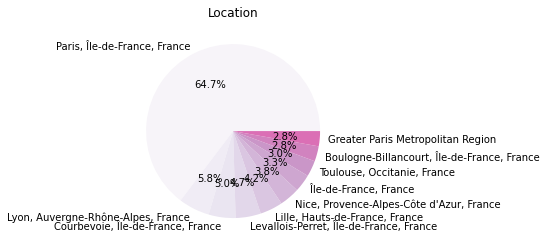

In [760]:
color = plt.cm.PuRd(np.linspace(0,1,20))
df["Location"].value_counts().sort_values(ascending=False).head(10).plot.pie(y="Location",colors=color,autopct="%0.1f%%")
plt.title("Location")
plt.axis("off")
plt.show()

# Titre

In [761]:
# Nombre de poste
df['Titre'].count()


978

### Which of the Data Science positions is the most popular?

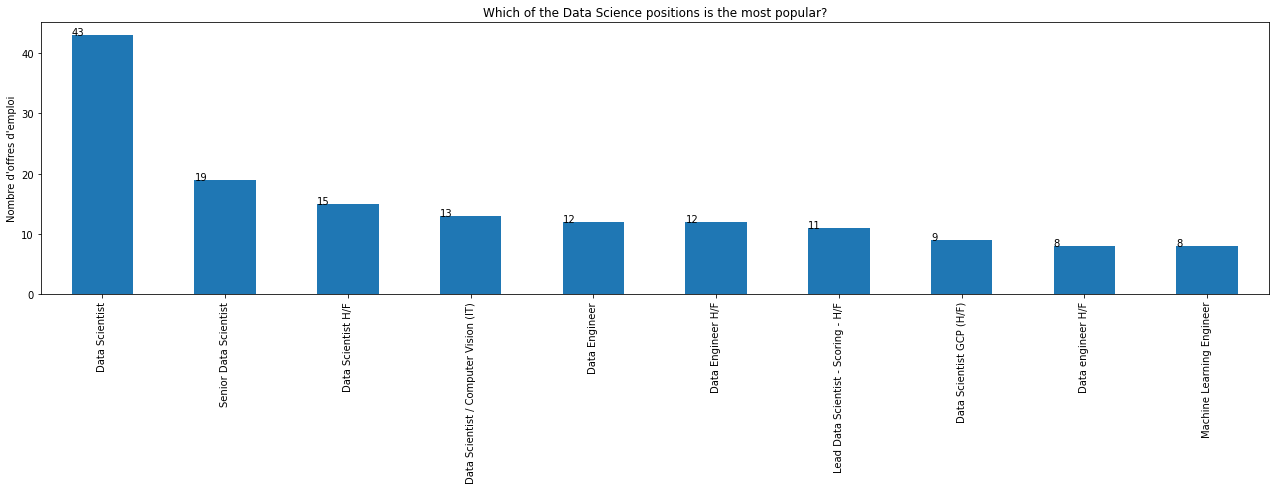

In [762]:
df1 = df['Titre'].value_counts().sort_values(ascending=False).head(n=10).plot.bar(figsize=(22, 5), ylabel="Nombre d'offres d'emploi");

for p in df1.patches:
    df1.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))


plt.title('Which of the Data Science positions is the most popular?')
plt.show()

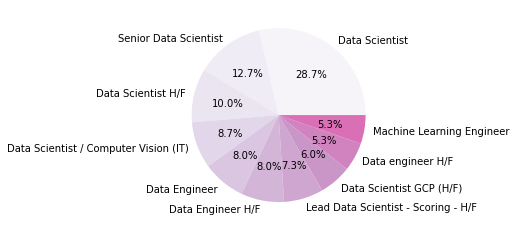

In [763]:
color = plt.cm.PuRd(np.linspace(0,1,20))
df["Titre"].value_counts().sort_values(ascending=False).head(10).plot.pie(y="Location",colors=color,autopct="%0.1f%%")
plt.title("")
plt.axis("off")
plt.show()

In [764]:
df.value_counts(["Titre"])

Titre                                
Data Scientist                           43
Senior Data Scientist                    19
Data Scientist H/F                       15
Data Scientist / Computer Vision (IT)    13
Data Engineer                            12
                                         ..
Data performance lead                     1
Data scientist F/H - Alternance           1
Data scientist H/F (IT)                   1
Data scientist H/F (internship)           1
Data Scientist Marketing (F/H)            1
Length: 460, dtype: int64

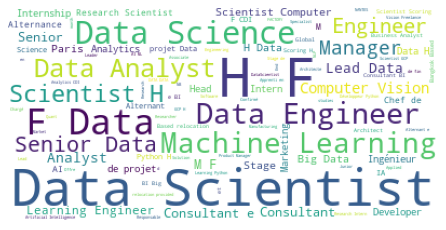

In [765]:
Titres_text = " ".join(df['Titre'].dropna().to_list())
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Titres_text)
  
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### By conventions, we have three main kinds of position in the data science industry: data engineer, data scientist and data analyst. However, since machine learning is a domain I am also in interested in, I will set a separated category for it.

# Description

In [766]:
#Import python libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import re
from collections import defaultdict

In [767]:
# Convert to strings
select_dat = select_dat.applymap(str)
# Replace certain strings
select_dat["Description"] = select_dat["Description"].replace(to_replace='Apply', value="",regex=True)
select_dat["Description"] = select_dat["Description"].replace(to_replace='apply', value="",regex=True)
select_dat["Description"] = select_dat["Description"].replace(to_replace='now', value="",regex=True)
select_dat["Description"] = select_dat["Description"].replace(to_replace='apply now', value="",regex=True)
select_dat["Description"] = select_dat["Description"].replace(to_replace='Apply Now', value="",regex=True)
select_dat["Description"] = select_dat["Description"].replace(to_replace='Job Description', value="",regex=True)
select_dat["Description"] = select_dat["Description"].replace(to_replace='job description', value="",regex=True)
select_dat["Description"] = select_dat["Description"].replace(to_replace='changes everything', value="",regex=True)
select_dat["Description"] = select_dat["Description"].replace(to_replace='everything', value="",regex=True)
select_dat["Description"] = select_dat["Description"].replace(to_replace='data scientist', value="Data Scientist",regex=True)

In [768]:
#View the resulting concatenated dataframe
select_dat.head()

,Titre,Description
0,Consultant BI (H/F),Je découvre les filiales \n\nRejoindre Davids...
1,Application Engineer - Machine Learning,"GrAI Matter Labs utilizes brain-inspired, neur..."
2,Lead Data Scientist,Notre offre\n\nTESSELLA est le World Class Cen...
3,Data Scientist,Data Scientist (H/F) \n[CDI] \n\nNew trends a...
4,Lead Data Scientist - Scoring - H/F,Le poste \n\nPython / Sql / Tableau / Agile ...


In [769]:
select_dat = df[["Titre","Description"]]
select_dat.head()

,Titre,Description
0,Consultant BI (H/F),Je découvre les filiales \n\nRejoindre Davids...
1,Application Engineer - Machine Learning,"GrAI Matter Labs utilizes brain-inspired, neur..."
2,Lead Data Scientist,Notre offre\n\nTESSELLA est le World Class Cen...
3,Data Scientist,Data Scientist (H/F) \n[CDI] \n\nNew trends a...
4,Lead Data Scientist - Scoring - H/F,Le poste \n\nPython / Sql / Tableau / Agile ...


In [770]:
#Select Data Scientist postings from the listings
Scientist = select_dat[select_dat['Titre'].str.contains("Data Scientist")] 
#View the slice
Scientist

,Titre,Description
2,Lead Data Scientist,Notre offre\n\nTESSELLA est le World Class Cen...
3,Data Scientist,Data Scientist (H/F) \n[CDI] \n\nNew trends a...
4,Lead Data Scientist - Scoring - H/F,Le poste \n\nPython / Sql / Tableau / Agile ...
5,Data Scientist Senior,Tu te sens prêt à plonger au cœur de la révolu...
8,Data Scientist Confirmé (H/F),Job Description \n\nJob Description \n\nData...
...,...,...
978,Senior Data Scientist,The Company \n\nRecently named one of Britain...
980,Data Scientist GCP (H/F),Atos est un leader international de la transfo...
982,Alternance - Data Scientist H/F,"Mission Générale \n\nIdentifier, collecter, v..."
984,Data Scientist,Who are we? \nSESAMm is the French leader in B...


In [771]:
#Select Data Analyst postings from the listings
Analyst = select_dat[select_dat['Titre'].str.contains("Data Analyst")] 
#View the slice
Analyst

,Titre,Description
9,Data Analyst Offre H/F,"Entreprise \n\nAvec Auchan, révélez vos talen..."
11,Data Analyst La Rochelle F/H,Entreprise \n\nFounded more than 10 years ago...
12,Data Analyst Senior Offre H/F,"Entreprise \n\nAvec Auchan, révélez vos talen..."
13,Tableau/ Data Analyst #: 21-03004,Job Description \n\nJob Title \n\nTableau/ D...
20,Data Analyst Paris F/H,Entreprise \n\nFounded more than 10 years ago...
...,...,...
962,Data Analyst,Description \n\nUKG is looking for a Data Ana...
964,Global Product Data Analyst (H/F),Résumé du poste :\n\nThe Data Product Analyst ...
969,Intern Data Analyst (m/f/d),Who We Are \n\nArtefact is a new generation o...
985,Data Analyst La Rochelle F/H,Entreprise \n\nFounded more than 10 years ago...


In [772]:
#Select Machine learning postings from the listings
ML = select_dat[select_dat['Titre'].str.contains("Machine Learning", 'Engineer')] 
#View the slice
ML

,Titre,Description
1,Application Engineer - Machine Learning,"GrAI Matter Labs utilizes brain-inspired, neur..."
15,Application Engineer - Machine Learning,"GrAI Matter Labs utilizes brain-inspired, neur..."
16,2021 Research Intern – Data Science & Machine ...,Our Company \n\nChanging the world through di...
40,Data Engineer / Machine Learning (Python) - H/F,"Description \n\nNotre client, acteur majeur d..."
85,2021 Research Intern – Data Science & Machine ...,Our Company \n\nChanging the world through di...
...,...,...
910,Machine Learning Engineer,Linkfluence first started as a passion project...
919,Data / Machine Learning Engineer - Python - Lille,Entreprise \n\nVous pensez comme nous que la ...
938,Senior Machine Learning Engineer,Onfido is the new identity standard for the in...
961,Machine Learning Engineer,"At Liftoff, we’re solving one of the core prob..."


In [773]:
#Select Big Data postings from the listings
BD = select_dat[select_dat['Titre'].str.contains("Big Data", 'Consultant')] 
#View the slice
BD

,Titre,Description
22,Consultant·e BI – Big Data Bordeaux,Job Description \n\nA propos d’Avanade France...
117,Data Scientist : Développement d’une architect...,Les technologies Big Data sont principalement ...
124,Consultant·e BI – Big Data,Job Description \n\nA propos d’Avanade France...
146,Consultant·e BI - Big Data Nantes,Job Description \n\nA propos d’Avanade France...
171,Architecte Data - Big Data,Rejoignez les équipes d’OPEN pour concevoir et...
215,Consultant·e BI – Big Data,Job Description \n\nA propos d’Avanade France...
247,Consultant·e BI – Big Data,Job Description \n\nA propos d’Avanade France...
311,Consultant·e BI - Big Data Lyon,Job Description \n\nA propos d’Avanade France...
411,Data Scientist Project Leader - Big Data & AI ...,"Allianz France, depuis 2016, développe des cap..."
520,Senior Data Scientist - Big Data & AI Factory,"Allianz France, depuis 2016, développe des cap..."


# N-gram Analysis

In [879]:
#Select descriptions from Scientist
Scientist_desc = Scientist["Description"]
Scientist_desc.replace('--', np.nan, inplace=True) 
Scientist_desc_na = Scientist_desc.dropna()
#convert list elements to lower case
Scientist_desc_na_cleaned = [item.lower() for item in Scientist_desc_na]
#remove html links from list 
Scientist_desc_na_cleaned =  [re.sub(r"http\S+", "", item) for item in Scientist_desc_na_cleaned]
#remove special characters left
Scientist_desc_na_cleaned = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", item) for item in Scientist_desc_na_cleaned]
#convert to dataframe
Scientist_desc_na_cleaned = pd.DataFrame(np.array(Scientist_desc_na_cleaned).reshape(-1))
#Squeeze dataframe to obtain series
Scientist_cleaned = Scientist_desc_na_cleaned.squeeze()

In [881]:
#Select descriptions from ML
ML_desc = ML["Description"]
ML_desc.replace('--', np.nan, inplace=True) 
ML_desc_na = ML_desc.dropna()
#convert list elements to lower case
ML_desc_na_cleaned = [item.lower() for item in ML_desc_na]
#remove html links from list 
ML_desc_na_cleaned =  [re.sub(r"http\S+", "", item) for item in ML_desc_na_cleaned]
#remove special characters left
ML_desc_na_cleaned = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", item) for item in ML_desc_na_cleaned]
#convert to dataframe
ML_desc_na_cleaned = pd.DataFrame(np.array(ML_desc_na_cleaned).reshape(-1))
#Squeeze dataframe to obtain series
ML_cleaned = ML_desc_na_cleaned.squeeze()

In [883]:
#Select descriptions from BD_US
BD_desc = BD["Description"]
BD_desc.replace('--', np.nan, inplace=True) 
BS_desc_na = BD_desc.dropna()
#convert list elements to lower case
BD_desc_na_cleaned = [item.lower() for item in BS_desc_na]
#remove html links from list 
BD_desc_na_cleaned =  [re.sub(r"http\S+", "", item) for item in BD_desc_na_cleaned]
#remove special characters left
BD_desc_na_cleaned = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", item) for item in BD_desc_na_cleaned]
#convert to dataframe
BD_desc_na_cleaned = pd.DataFrame(np.array(BD_desc_na_cleaned).reshape(-1))
#Squeeze dataframe to obtain series
BD_cleaned = BD_desc_na_cleaned.squeeze()

# Data Analyst N-gram analysis

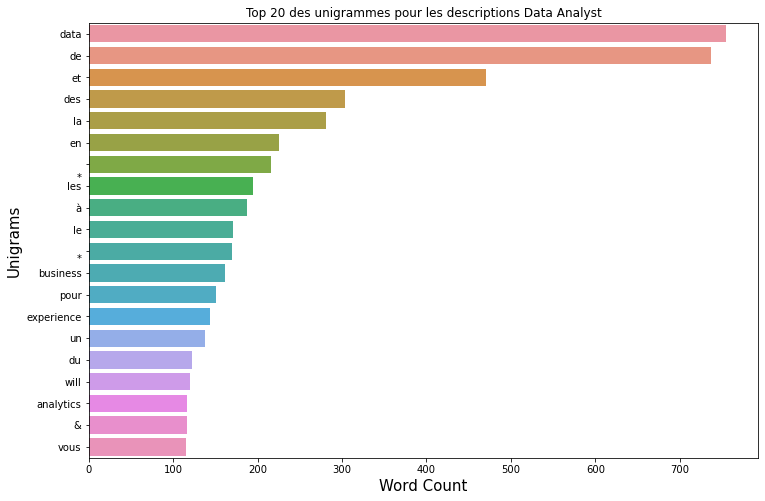

In [885]:
#Generate unigram for data analyst
Analyst_1gram = generate_ngrams(Analyst_cleaned, 1, 20)
#generate barplot for unigram
plt.figure(figsize=(12,8))
sns.barplot(Analyst_1gram["wordcount"],Analyst_1gram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Unigrams", fontsize=15)
plt.title("Top 20 des unigrammes pour les descriptions Data Analyst")
plt.show()

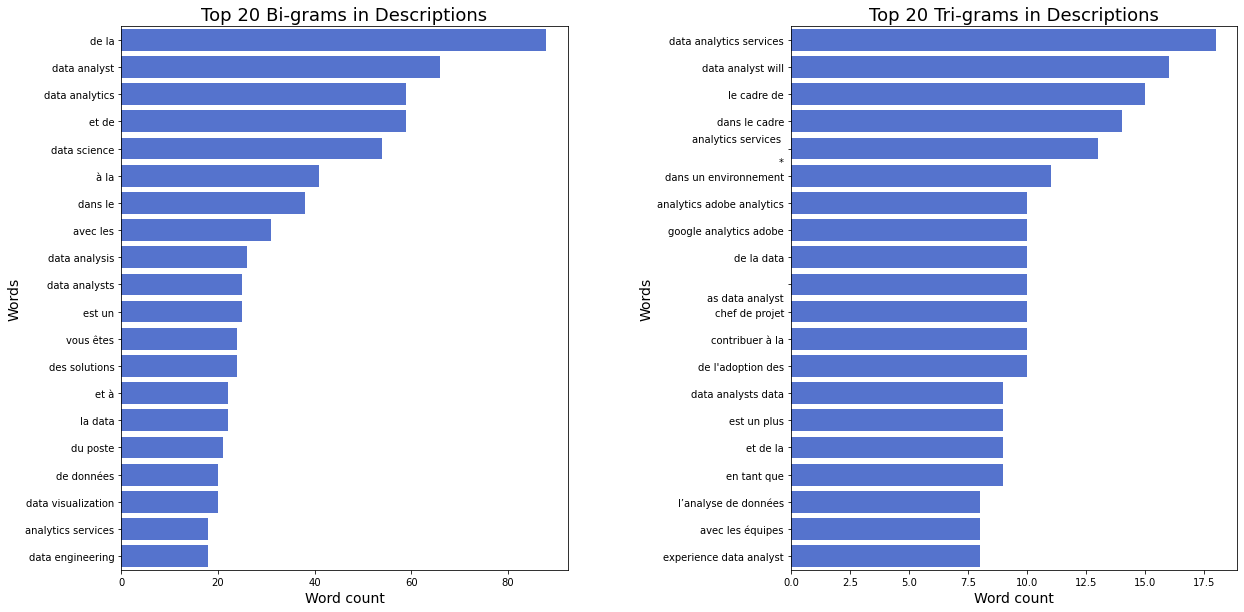

In [886]:
#Obtain bi-grams and tri-grams (top 20)
Analyst_2gram = generate_ngrams(Analyst_cleaned, 2, 20)
Analyst_3gram = generate_ngrams(Analyst_cleaned, 3, 20)
#compare the bar plots
comparison_plot(Analyst_2gram,Analyst_3gram,'word','wordcount', 0.5)

# Data Scientist N-gram Analysis


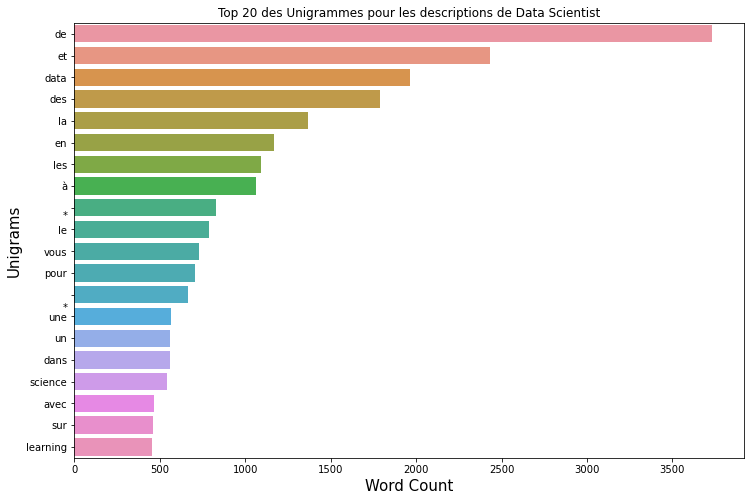

In [785]:
#Generate unigram for data analyst
Scientist_1gram = generate_ngrams(Scientist_cleaned, 1, 20)
#generate barplot for unigram
plt.figure(figsize=(12,8))
sns.barplot(Scientist_1gram["wordcount"],Scientist_1gram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Unigrams", fontsize=15)
plt.title("Top 20 des Unigrammes pour les descriptions de Data Scientist")
plt.show()

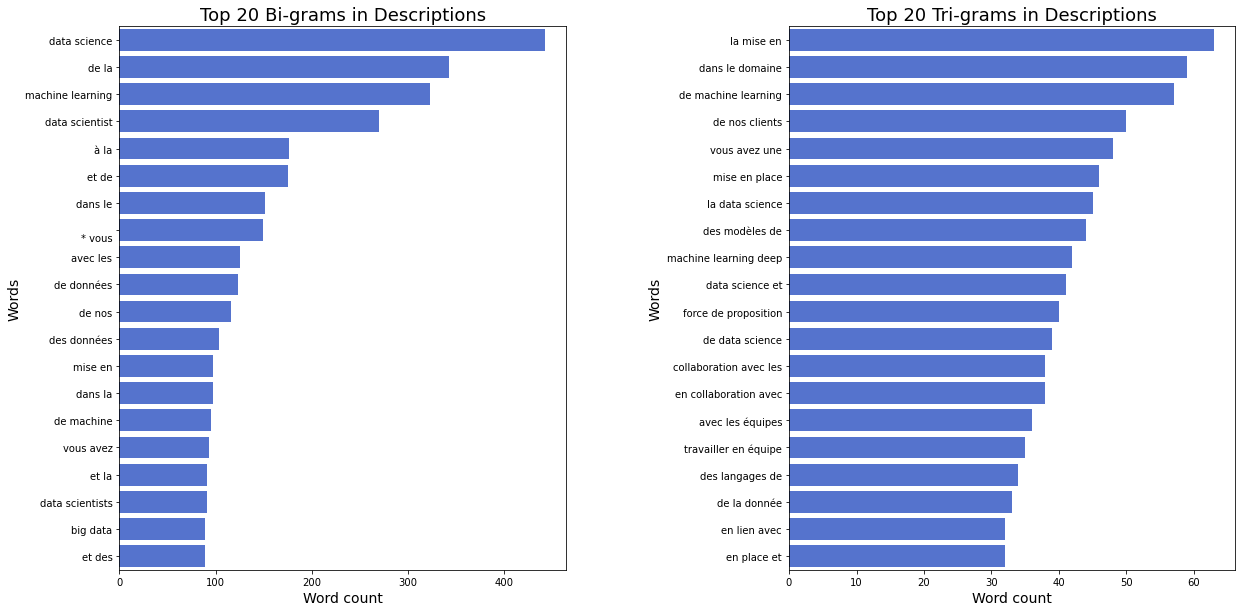

In [786]:
#Obtain bi-grams and tri-grams (top 20)
Scientist_2gram = generate_ngrams(Scientist_cleaned, 2, 20)
Scientist_3gram = generate_ngrams(Scientist_cleaned, 3, 20)
#compare the bar plots
comparison_plot(Scientist_2gram,Scientist_3gram,'word','wordcount', 0.5)

The n-gram analysis for the "Data Scientist" position further appears to that the role can is focused on using statistical techniques and machine learning models to analyse large datasets. It can be inferred that, similar to the "Data Analyst" position, the "Data Scientist" has to use skills across the fields of data mining, big data, analytics and machine learning.

# Machine Learning Positions N-gram Analysis


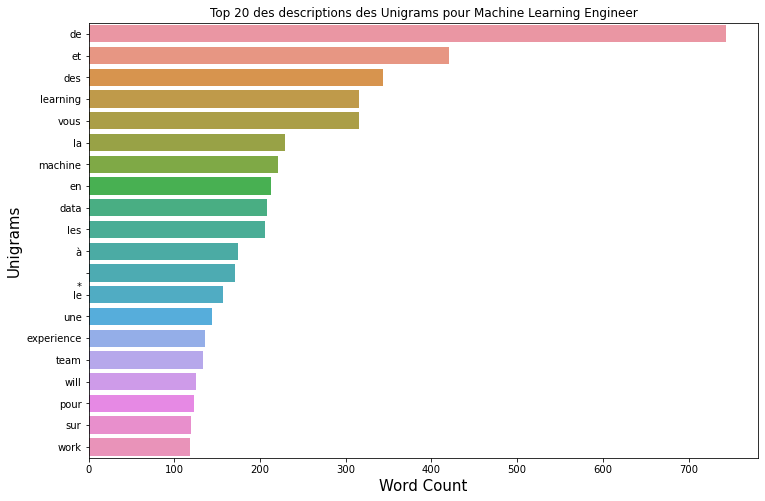

In [787]:
#Generate unigram for ML positions
Scientist_1gram = generate_ngrams(ML_cleaned, 1, 20)
#generate barplot for unigram
plt.figure(figsize=(12,8))
sns.barplot(Scientist_1gram["wordcount"],Scientist_1gram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Unigrams", fontsize=15)
plt.title("Top 20 des descriptions des Unigrams pour Machine Learning Engineer")
plt.show()

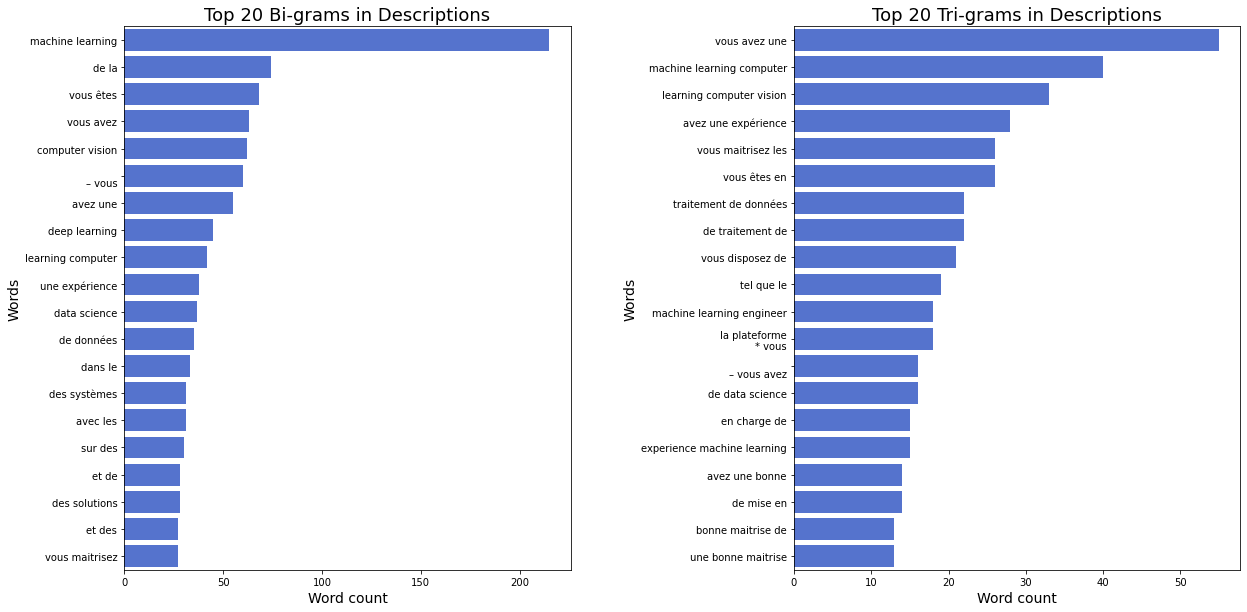

In [788]:
#Obtain bi-grams and tri-grams (top 20)
ML_2gram = generate_ngrams(ML_cleaned, 2, 20)
ML_3gram = generate_ngrams(ML_cleaned, 3, 20)
#compare the bar plots
comparison_plot(ML_2gram,ML_3gram,'word','wordcount', 0.5)

The n-gram analysis for the "Machine Learning" positions reveal that they are indeed an engineering related role, with a degree in computer science being typically required. Additionally, it is also revealed to be a more specific role than its "Data Scientist" counterpart where terms such as deep learning, software development, language processing and artificial intelligence are used.

# Big Data Positions N-gram Analysis

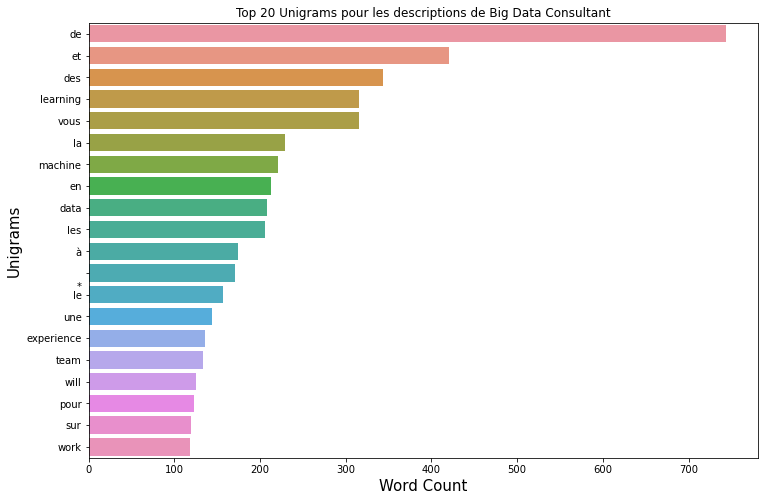

In [789]:
#Generate unigram for ML positions
BD_1gram = generate_ngrams(BD_cleaned, 1, 20)
#generate barplot for unigram
plt.figure(figsize=(12,8))
sns.barplot(Scientist_1gram["wordcount"],Scientist_1gram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Unigrams", fontsize=15)
plt.title("Top 20 Unigrams pour les descriptions de Big Data Consultant")
plt.show()

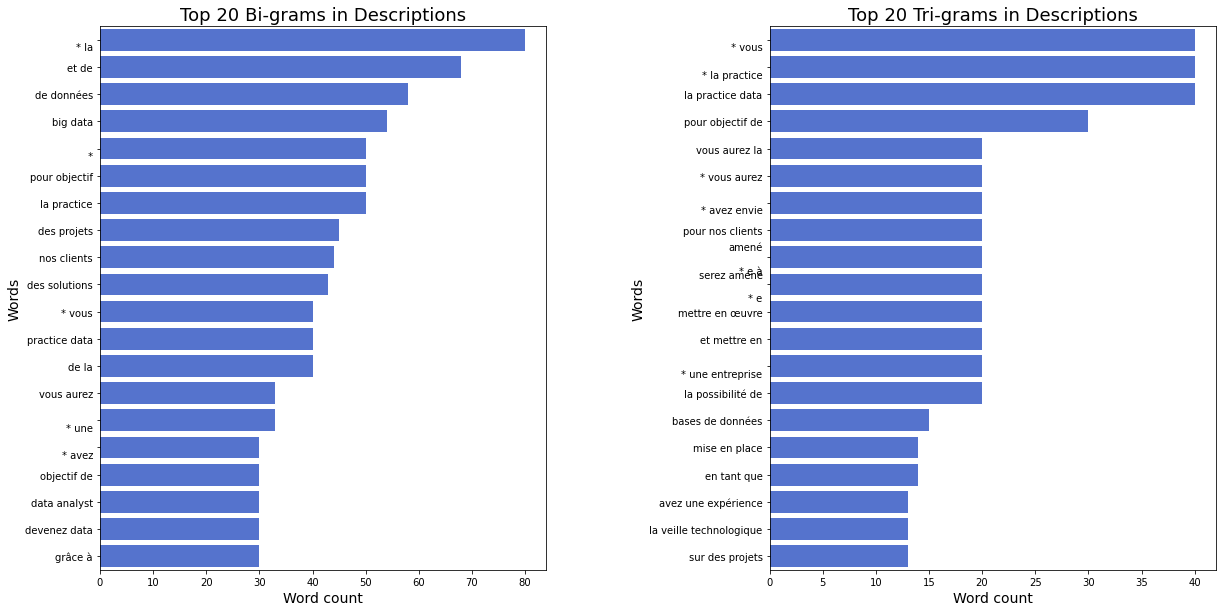

In [790]:
#Obtain bi-grams and tri-grams (top 20)
BD_2gram = generate_ngrams(BD_cleaned, 2, 20)
BD_3gram = generate_ngrams(BD_cleaned, 3, 20)
#compare the bar plots
comparison_plot(BD_2gram,BD_3gram,'word','wordcount', 0.5)

In [791]:
!pip -q install --upgrade seaborn

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

You should consider upgrading via the 'c:\users\phamd\anaconda3\python.exe -m pip install --upgrade pip' command.


In [792]:
def get_keywords_languages(df_keywords_list, num_listings):
    languages = ["Python", "C++", "MATLAB", ".NET", "C#", "JavaScript", "HTML", "Bash", "Java", "Scala", "SQL"]
    languages_freq = dict()
    for item in languages:
        counter = 0
        for it in df_keywords_list:
            if item.lower() in it:
                counter += 1
        languages_freq[item] = counter
    df_languages = pd.DataFrame(list(languages_freq.items()),columns = ['Languages','Count']) 
    df_languages['Count'] = df_languages['Count'].div(1.0 * num_listings)
    df_languages = df_languages.sort_values(["Count"], axis=0, ascending=False)
    return df_languages
    
def get_keywords_tools(df_keywords_list, num_listings):
    big_data  = ["Big Data", "ETL", "Hadoop", "Spark", "Impala", "Cassandra", "Kafka", "HDFS", "HBase", "Hive", "Kubernetes", "Kubeflow", "Airflow", "BigQuery"]
    big_data_freq = dict()
    for item in big_data:
        counter = 0
        for it in df_keywords_list:
            if item.lower() in it:
                counter += 1
        big_data_freq[item] = counter
    df_big_data = pd.DataFrame(list(big_data_freq.items()),columns = ['Tools','Count']) 
    df_big_data['Count'] = df_big_data['Count'].div(1.0 * num_listings)
    df_big_data = df_big_data.sort_values(["Count"], axis=0, ascending=False)
    return df_big_data

def get_keywords_cloud(df_keywords_list, num_listings):
    cloud = ["AWS", "GCP","Azure", "Google Cloud", "S3","Redshift","EC2","Lambda","Route S3","Dynamo DB"]
    cloud_freq = dict()
    for item in cloud:
        counter = 0
        for it in df_keywords_list:
            if item.lower() in it:
                counter += 1
        cloud_freq[item] = counter
    df_cloud = pd.DataFrame(list(cloud_freq.items()),columns = ['Cloud','Count']) 
    df_cloud['Count'] = df_cloud['Count'].div(1.0 * num_listings)
    df_cloud = df_cloud.sort_values(["Count"], axis=0, ascending=False)
    return df_cloud

def get_keywords_exp_edu(df_keywords_list, num_listings):
    exp_edu  = ["BSc", "MSc","PhD", "Full-Time", "Intern", "Junior", "Senior", "Remote", "Master", "Doctorate", "Bachelor", "Post-Doc"]
    exp_edu_freq = dict()
    for item in exp_edu:
        counter = 0
        for it in df_keywords_list:
            if item.lower() in it:
                counter += 1
        exp_edu_freq[item] = counter
    df_exp_edu = pd.DataFrame(list(exp_edu_freq.items()),columns = ['Experience/Education','Count']) 
    df_exp_edu['Count'] = df_exp_edu['Count'].div(1.0 * num_listings)
    df_exp_edu = df_exp_edu.sort_values(["Count"], axis=0, ascending=False)
    return df_exp_edu

In [793]:
def plot_programming_languages(position):
    num_listings = len(df.loc[df['Titre'].str.lower().str.contains(position.lower()), :])
    job_keywords = [x.lower() for x in df.loc[df['Titre'].str.lower().str.contains(position.lower()), "Description"].tolist()]

    plt.figure(figsize=(22, 6))
    sns.barplot(data=get_keywords_languages(job_keywords, num_listings).head(10), x="Languages", y="Count");
    plt.xlabel("Mots-clés liés aux langages (de programmation)")
    plt.ylabel(f"%  de {position} listes");
    
    
def plot_tools_and_tech(position):
    num_listings = len(df.loc[df['Titre'].str.lower().str.contains(position.lower()), :])
    job_keywords = [x.lower() for x in df.loc[df['Titre'].str.lower().str.contains(position.lower()), "Description"].tolist()]

    plt.figure(figsize=(22, 6))
    sns.barplot(data=get_keywords_tools(job_keywords, num_listings).head(10), x="Tools", y="Count");
    plt.xlabel("Mots-clés liés aux outils et technologies")
    plt.ylabel(f"%  de {position} listes");
    
    
def plot_cloud(position):
    num_listings = len(df.loc[df['Titre'].str.lower().str.contains(position.lower()), :])
    job_keywords = [x.lower() for x in df.loc[df['Titre'].str.lower().str.contains(position.lower()), "Description"].tolist()]

    plt.figure(figsize=(22, 6))
    sns.barplot(data=get_keywords_cloud(job_keywords, num_listings).head(10), x="Cloud", y="Count");
    plt.xlabel("Mots-clés liés au cloud computing et au stockage")
    plt.ylabel(f"%  of {position} listes");
    
    
def plot_exp_edu(position):
    num_listings = len(df.loc[df['Titre'].str.lower().str.contains(position.lower()), :])
    job_keywords = [x.lower() for x in df.loc[df['Titre'].str.lower().str.contains(position.lower()), "Description"].tolist()]

    plt.figure(figsize=(22, 6))
    sns.barplot(data=get_keywords_exp_edu(job_keywords, num_listings).head(10), x="Experience/Education", y="Count");
    plt.xlabel("Mots-clés liés à l'expérience/éducation")
    plt.ylabel(f"%  de {position} listes");

## Data Analyst

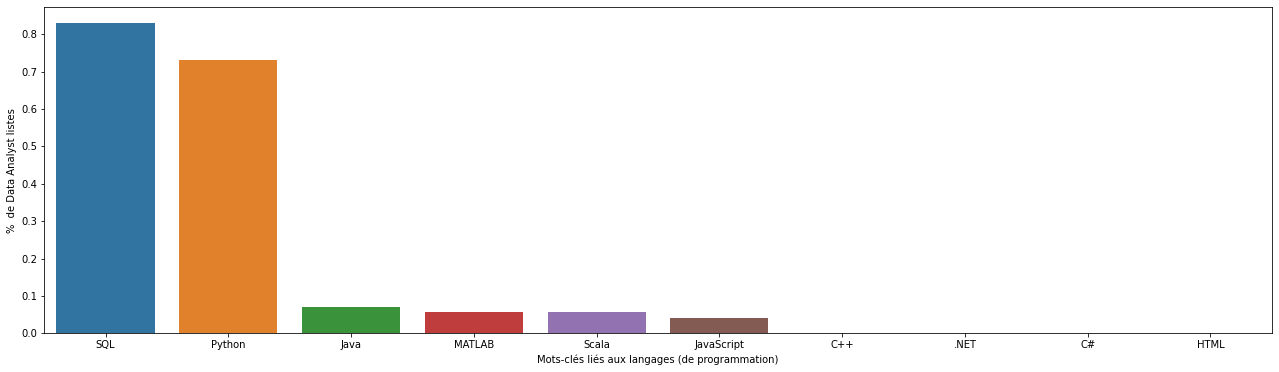

In [794]:
plot_programming_languages(position='Data Analyst')

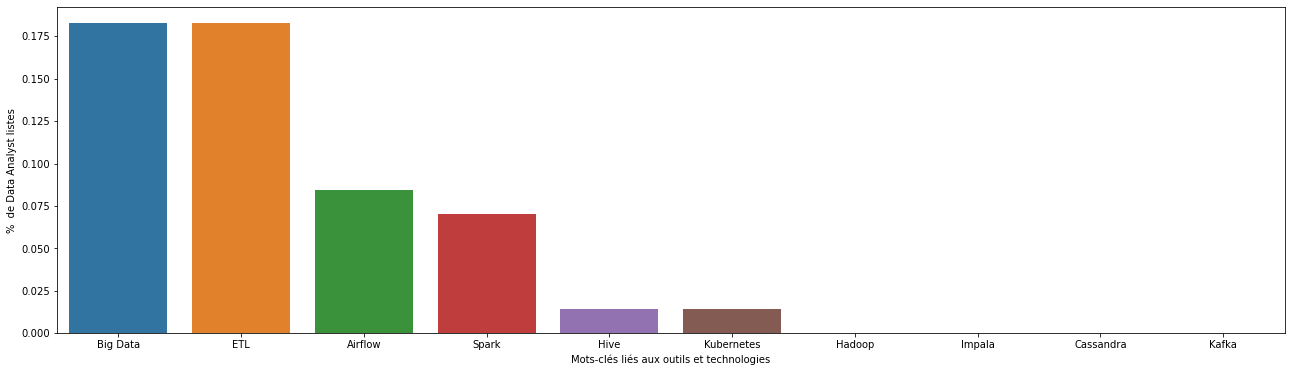

In [795]:
plot_tools_and_tech(position='Data Analyst')

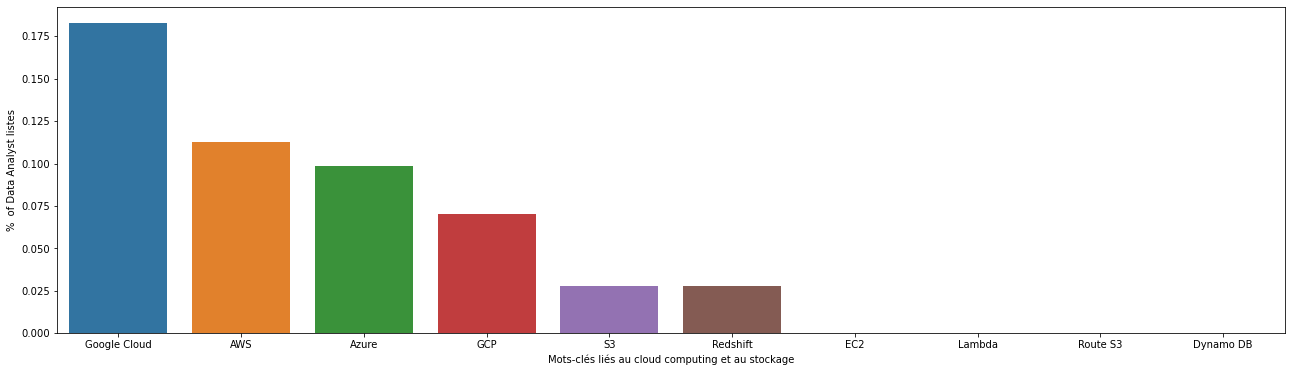

In [796]:
plot_cloud(position='Data Analyst')

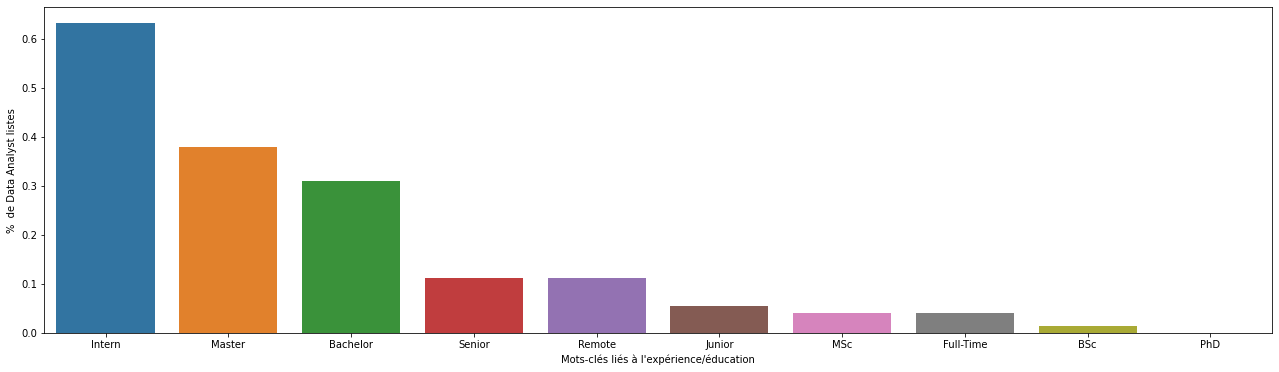

In [797]:
plot_exp_edu(position='Data Analyst')

# Big Data Consultant

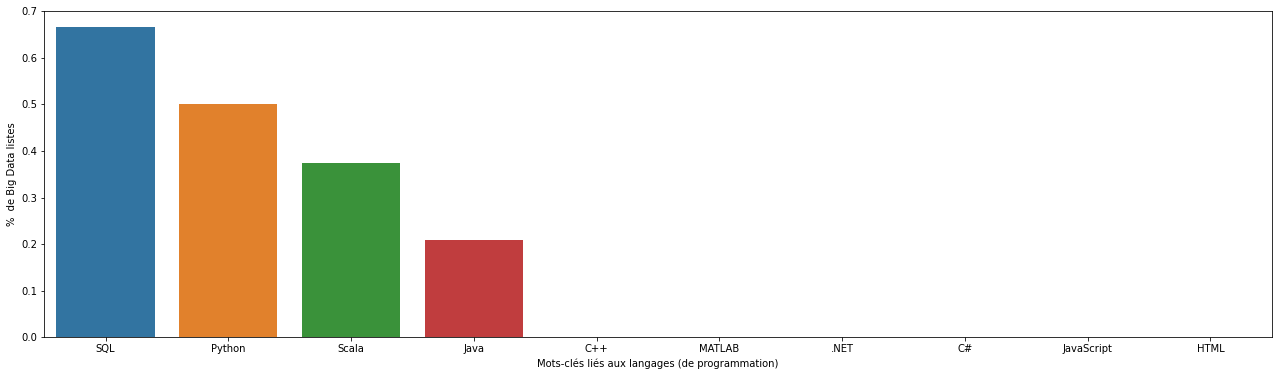

In [798]:
plot_programming_languages(position='Big Data')

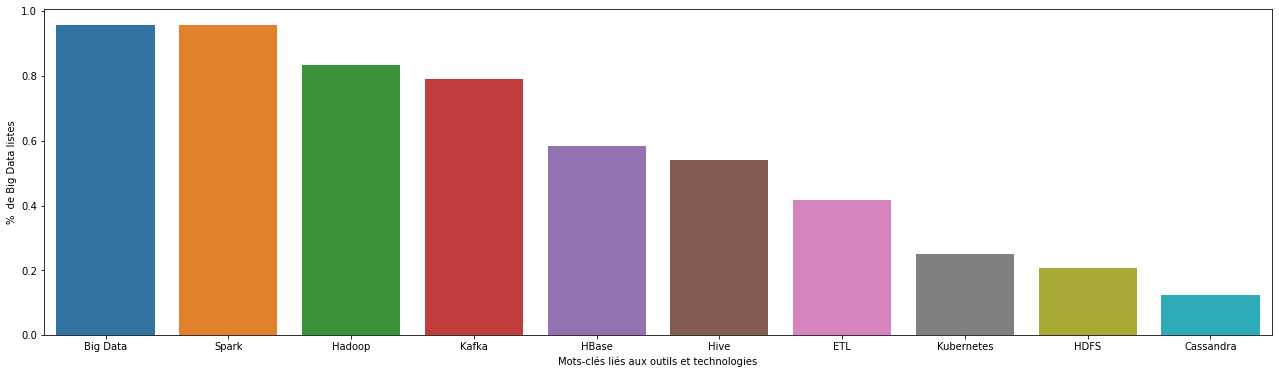

In [799]:
plot_tools_and_tech(position='Big Data')

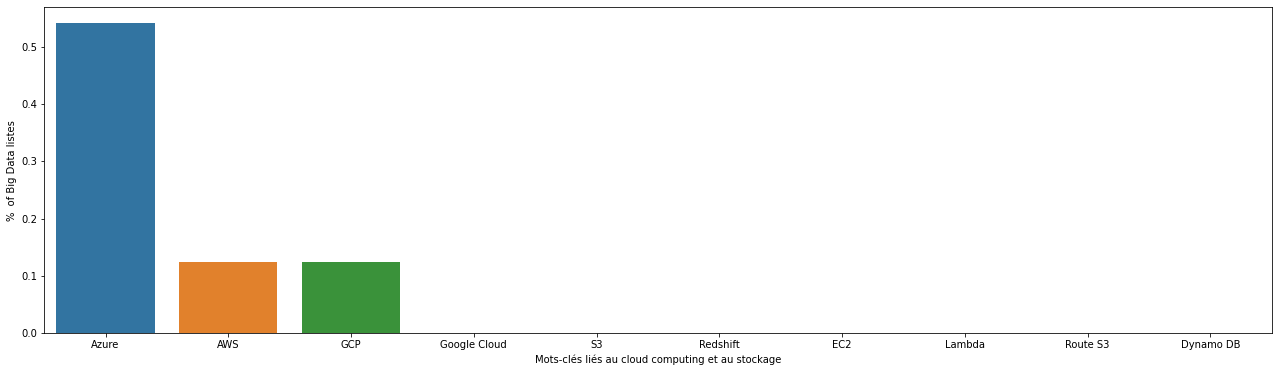

In [800]:
plot_cloud(position='Big Data')

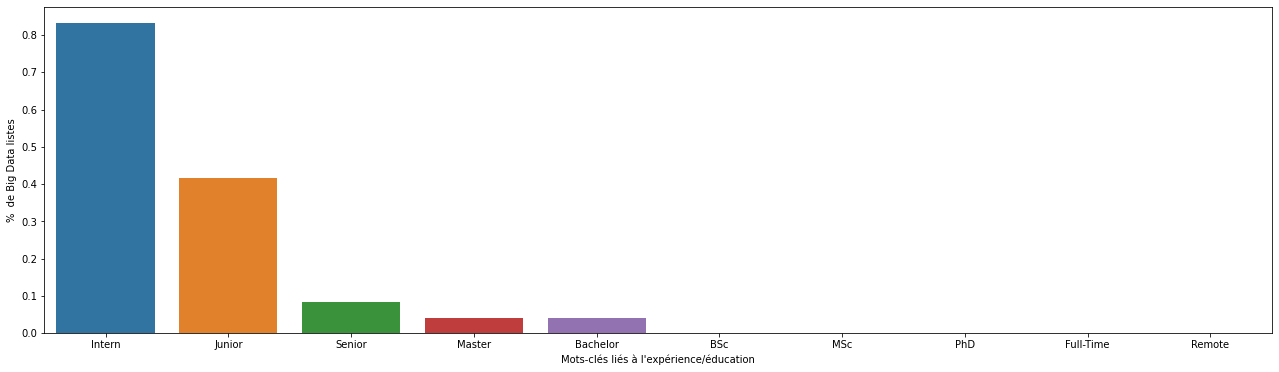

In [801]:
plot_exp_edu(position='Big Data')

## Data Scientist

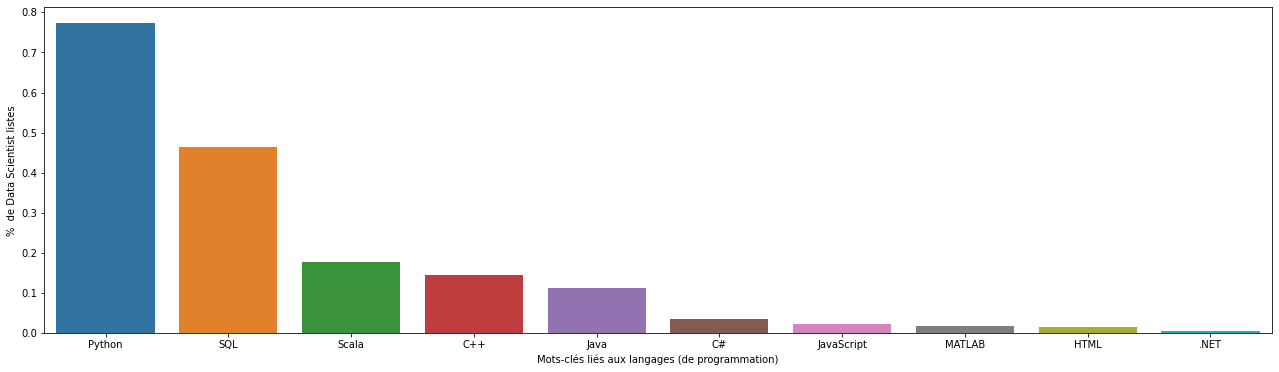

In [802]:
plot_programming_languages(position='Data Scientist')

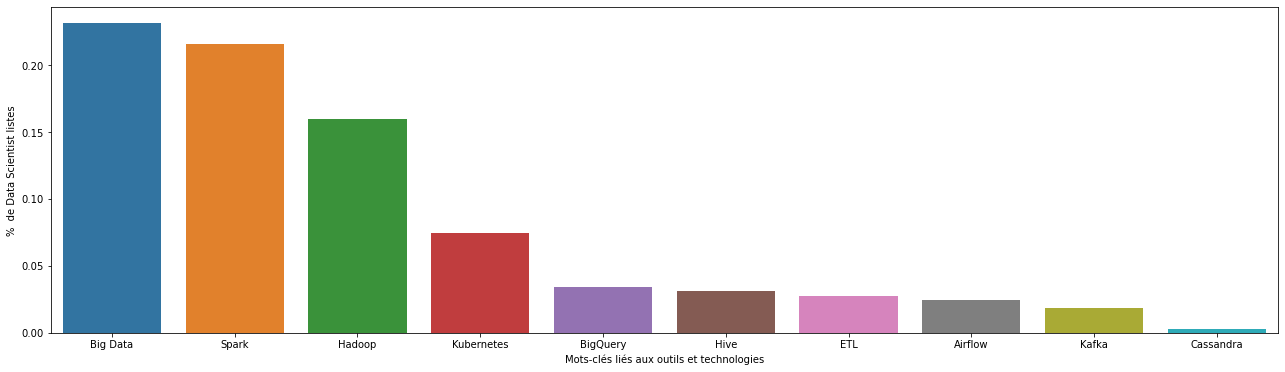

In [803]:
plot_tools_and_tech(position='Data Scientist')

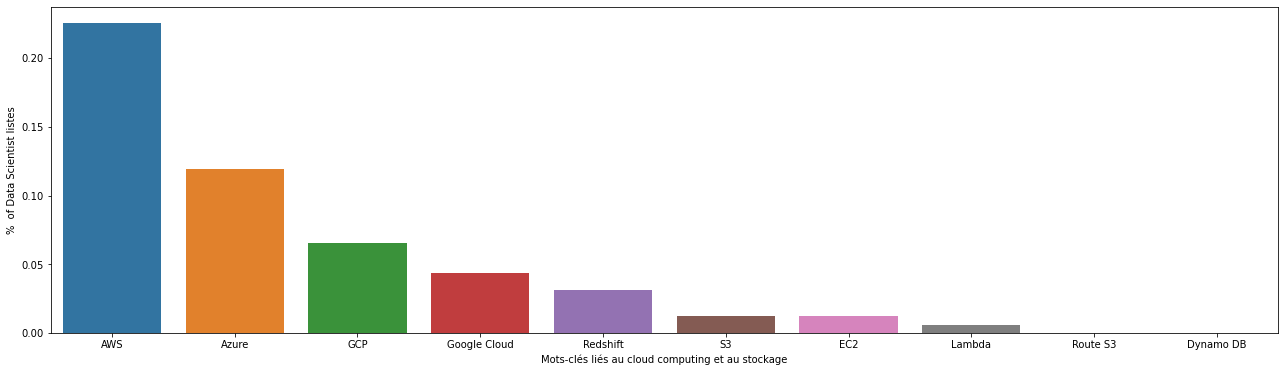

In [804]:
plot_cloud(position='Data Scientist')


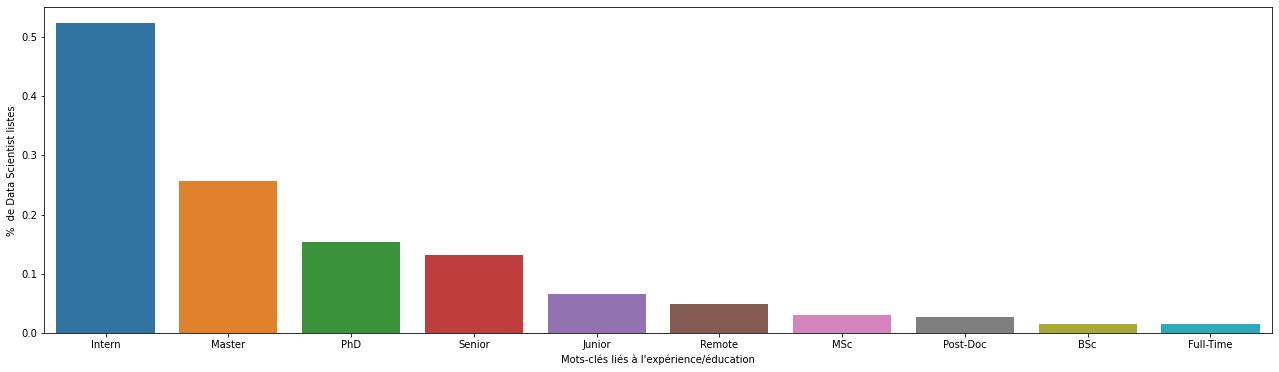

In [805]:
plot_exp_edu(position='Data Scientist')

### Machine Learning Engineer

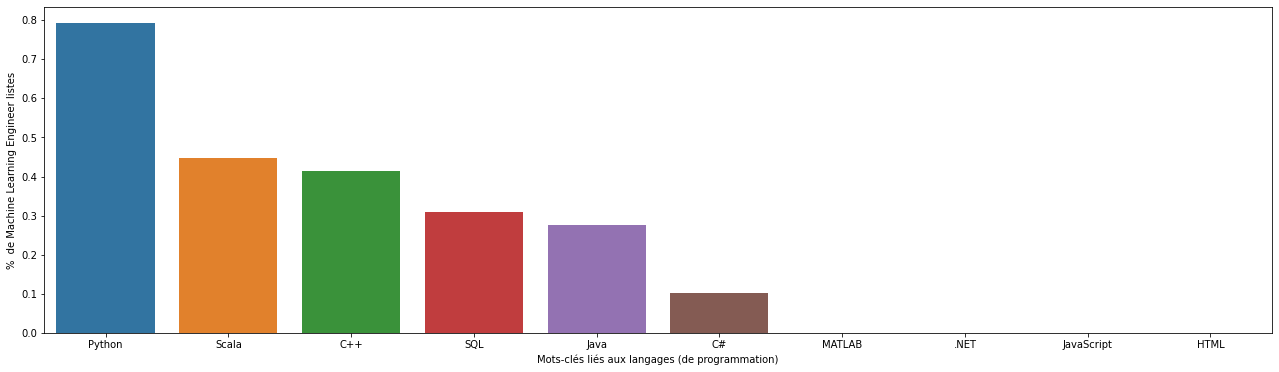

In [806]:
plot_programming_languages(position='Machine Learning Engineer')

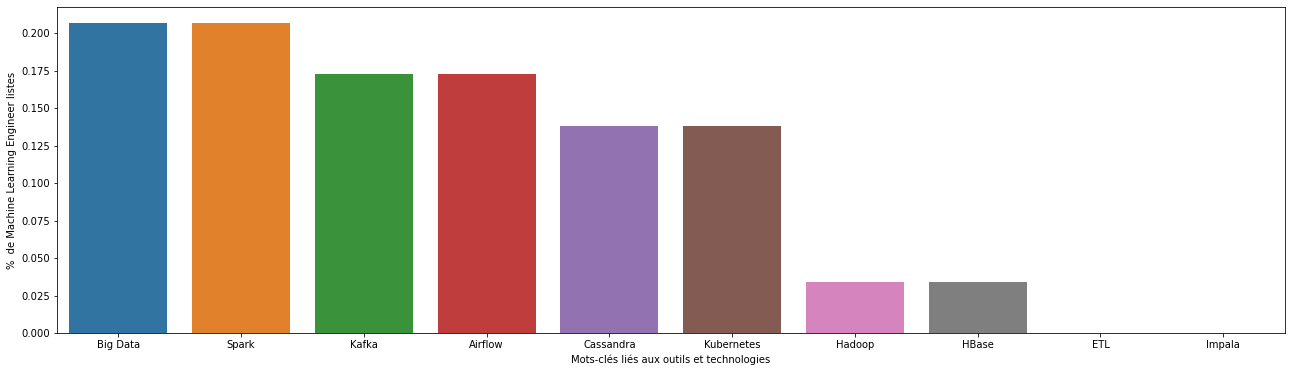

In [807]:
plot_tools_and_tech(position='Machine Learning Engineer')

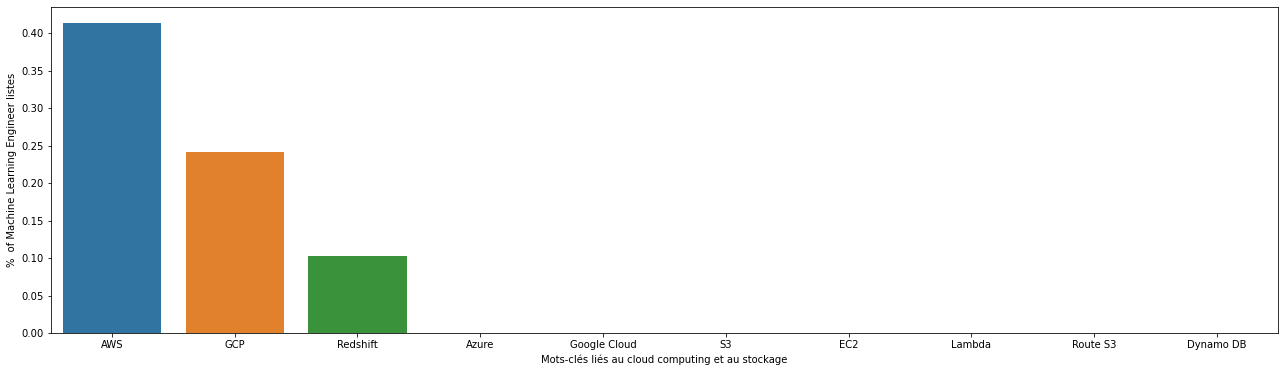

In [808]:
plot_cloud(position='Machine Learning Engineer')

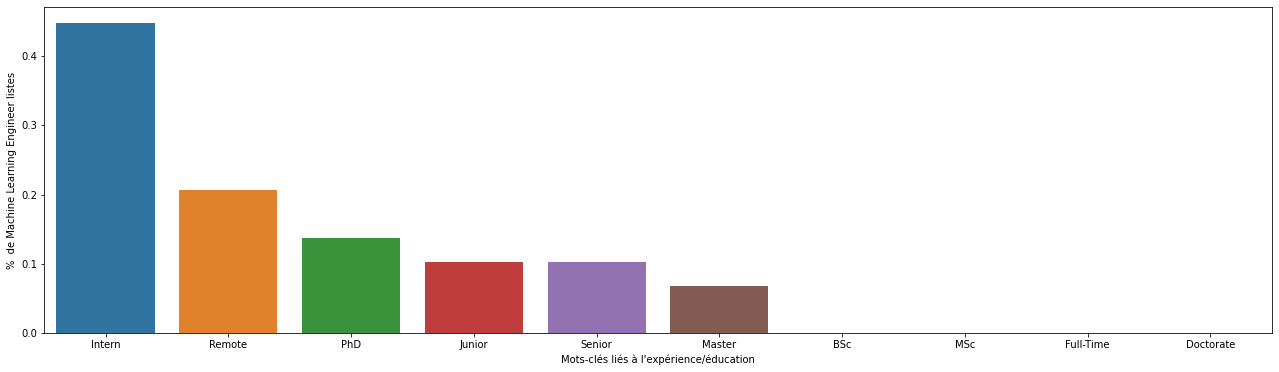

In [809]:
plot_exp_edu(position='Machine Learning Engineer')

# Niveau d'expérience 

In [810]:
df['Niveau_experience'].value_counts().reset_index()


,index,Niveau_experience
0,Entry level,369
1,Associate,304
2,Not Applicable,127
3,Mid-Senior level,100
4,Internship,56
5,Director,18
6,Executive,4


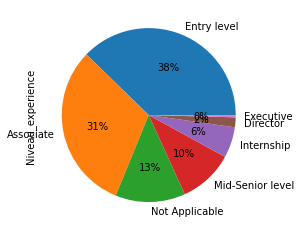

In [811]:
df3 = df['Niveau_experience'].value_counts().plot(kind="pie", autopct='%1.0f%%')
plt.show()

# Catégorie

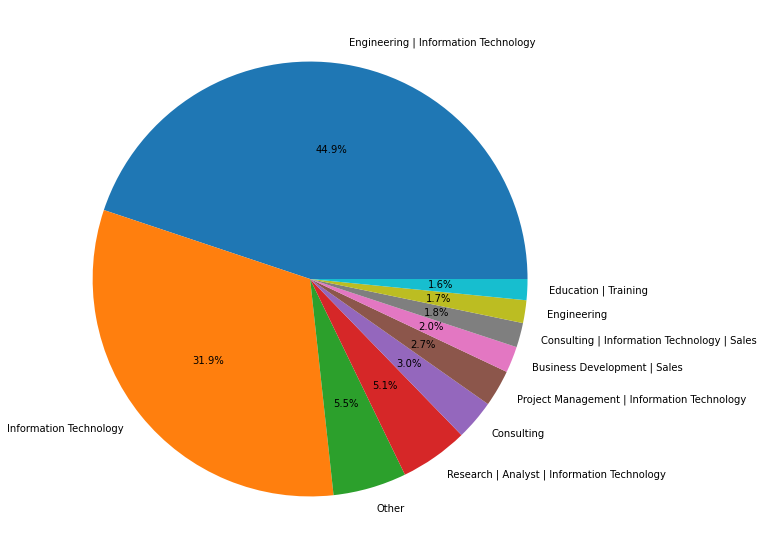

In [812]:
df_job_category = df.job_category.value_counts().sort_values(ascending=False).head(n=10)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
df_job_category.plot.pie(autopct='%1.1f%%', ylabel="");

# Type

In [813]:
df['Type_poste'].value_counts().reset_index()


,index,Type_poste
0,Full-time,908
1,Internship,48
2,Contract,12
3,Part-time,6
4,Other,3
5,Temporary,1


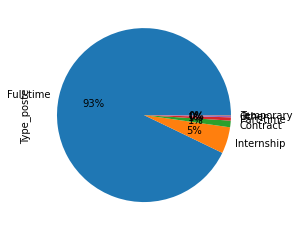

In [814]:
df3 = df['Type_poste'].value_counts().plot(kind="pie", autopct='%1.0f%%')
plt.show()

# Industrie

In [815]:
df['Industrie'].value_counts().reset_index()


,index,Industrie
0,Information Technology and Services | Computer...,172
1,Computer Software,64
2,Information Technology and Services,62
3,Information Technology and Services | Computer...,44
4,Information Technology and Services | Computer...,39
...,...,...
170,Electrical/Electronic Manufacturing | Industri...,1
171,Computer Software | Research | Biotechnology,1
172,Research | Staffing and Recruiting | Hospital ...,1
173,Computer Software | Capital Markets | Informat...,1


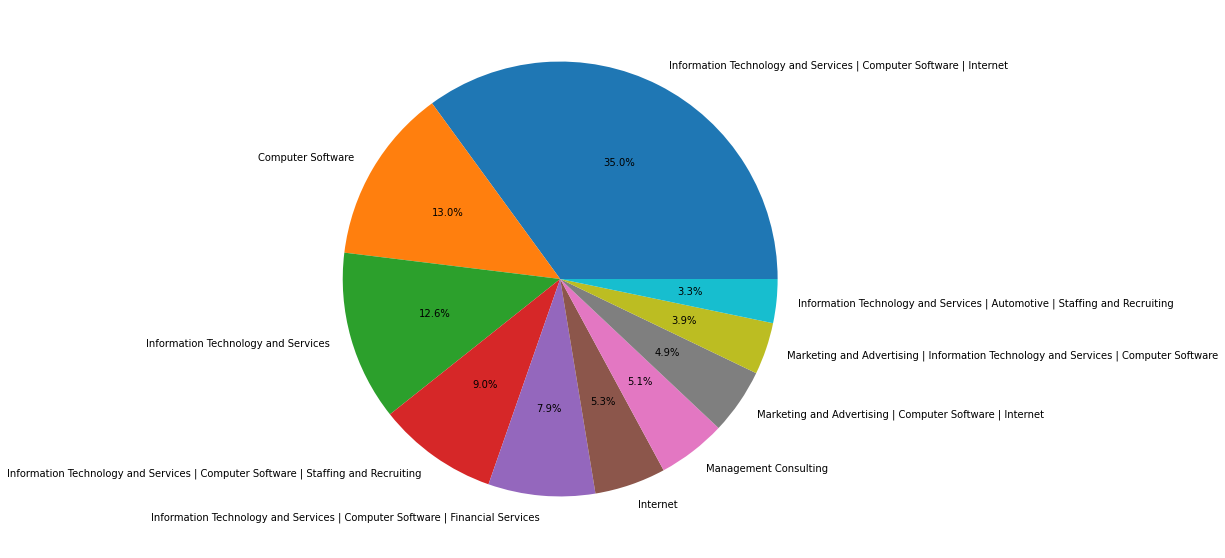

In [816]:
df_sectors = df.Industrie.value_counts().sort_values(ascending=False).head(n=10)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
df_sectors.plot.pie(autopct='%1.1f%%', ylabel="");

# Année d'expérience requis

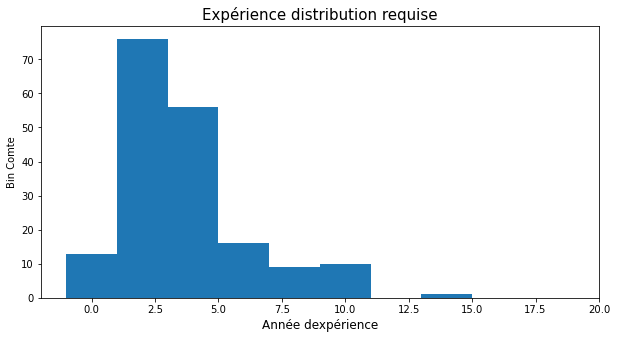

The average year of experience required is 4.25 years


In [875]:
plt.figure(figsize = (10,5))
plt.hist(experience_req,bins = list(range(0,21,2)), align = 'left')
plt.title('Expérience distribution requise', size = 15)
plt.ylabel('Bin Comte')
plt.xlabel('Année dexpérience', size = 12)
plt.show()
print(f'The average year of experience required is {round(np.mean(experience_req),2)} years')

# Skill Requirement 

In [876]:
# Create a regex search function
def count_text(patt,text):
    pattern = re.compile(patt)
    count = 0
    for t in text:
        if pattern.search(t):
            count+=1
    return count

In [877]:
# Create a data frame with skills name and regex pattern to search with
skills = ['R','Python','Hadoop','SQL','Tableau','TensorFlow','Agile','Power BI','SSaS','Algorithm','Java','Visualization']

skill_patt = ['\WR\W+\s*','(?i)\WPython\W','(?i)\WHadoop\W?','(?i)SQL\w*','(?i)\WTableau\W?',
              "(?i)\WTensorFlow\W?","(?i)\WAgile\W?","(?i)\WPower\s?BI\W?",
             "(?i)\WSSAS\W?","(?i)\WAlgorithms?\W?",'(?i)Java\w*','(?i)\WVisualization\W?']

skill_df =pd.DataFrame(
    {"skill": skills,
     "regex_pattern":skill_patt})

In [878]:
# Iterate through the list of skill using the search function created
i = []
for x in skill_df['regex_pattern']:
    i.append(count_text(x,text))
skill_df['count'] = i
skill_df['ptg'] = round(skill_df['count']/len(text),2)
skill_df

,skill,regex_pattern,count,ptg
0,R,\WR\W+\s*,372,0.38
1,Python,(?i)\WPython\W,639,0.65
2,Hadoop,(?i)\WHadoop\W?,129,0.13
3,SQL,(?i)SQL\w*,366,0.37
4,Tableau,(?i)\WTableau\W?,157,0.16
5,TensorFlow,(?i)\WTensorFlow\W?,140,0.14
6,Agile,(?i)\WAgile\W?,237,0.24
7,Power BI,(?i)\WPower\s?BI\W?,131,0.13
8,SSaS,(?i)\WSSAS\W?,11,0.01
9,Algorithm,(?i)\WAlgorithms?\W?,363,0.37


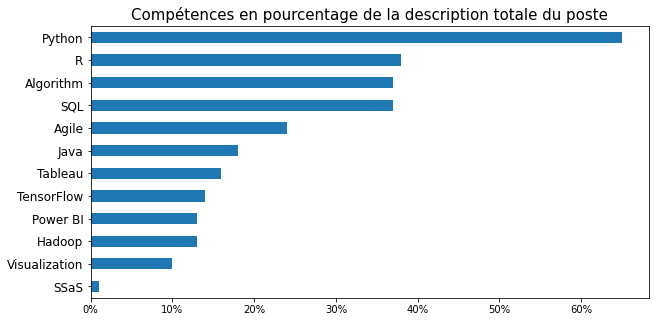

In [866]:
x = skill_df.sort_values(by = 'ptg')
ax =x['ptg'].plot(kind = "barh",figsize = (10,5))
ax.set_title('Compétences en pourcentage de la description totale du poste', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
plt.show()

# Description (Wordcloud)

In [867]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud

In [868]:
data = pd.read_excel('C:/Users/phamd/Downloads/Jobs.xlsx')
data.head()

,Entreprise,Location,ID,Titre,Application,Date,Description,Niveau_experience,job_category,Type_poste,Industrie,job_apply_link,job_url,search_url
0,Davidson consulting,"Valbonne, Provence-Alpes-Côte d'Azur, France",2542453760,Consultant BI (H/F),Be among the first 25 applicants,2021-05-10,Je découvre les filiales \n\nRejoindre Davids...,Associate,Information Technology,Full-time,Computer Software | Internet | Staffing and Re...,http://www.experteer.fr/career/lp/signup_verti...,https://fr.linkedin.com/jobs/view/consultant-b...,https://www.linkedin.com/jobs/search/?geoId=10...
1,GrAI Matter Labs,"Paris, Île-de-France, France",2526303569,Application Engineer - Machine Learning,Be among the first 25 applicants,2021-04-05,"GrAI Matter Labs utilizes brain-inspired, neur...",Entry level,Engineering | Information Technology,Full-time,Information Technology and Services | Computer...,https://fr.jooble.org/external/718776688222822...,https://fr.linkedin.com/jobs/view/application-...,https://www.linkedin.com/jobs/search/?geoId=10...
2,Capgemini Engineering,Greater Toulouse Metropolitan Area,2486573814,Lead Data Scientist,Be among the first 25 applicants,2021-04-27,Notre offre\n\nTESSELLA est le World Class Cen...,Not Applicable,Engineering | Information Technology | Research,Full-time,Information Technology and Services,NaN,https://fr.linkedin.com/jobs/view/lead-data-sc...,https://www.linkedin.com/jobs/search/?geoId=10...
3,Faurecia,"Paris, Île-de-France, France",2522211414,Data Scientist,35 applicants,2021-05-06,Data Scientist (H/F) \n[CDI] \n\nNew trends a...,Not Applicable,Engineering | Information Technology,Full-time,Automotive,https://careers.faurecia.com/job/Paris-Data-Sc...,https://fr.linkedin.com/jobs/view/data-scienti...,https://www.linkedin.com/jobs/search/?geoId=10...
4,UNLCK,"Paris, Île-de-France, France",2553254896,Lead Data Scientist - Scoring - H/F,Be among the first 25 applicants,2021-05-17,Le poste \n\nPython / Sql / Tableau / Agile ...,Associate,Engineering | Information Technology,Full-time,Information Technology and Services | Computer...,https://fr.jooble.org/external/650202100594651...,https://fr.linkedin.com/jobs/view/lead-data-sc...,https://www.linkedin.com/jobs/search/?geoId=10...


In [872]:
from wordcloud import WordCloud,STOPWORDS

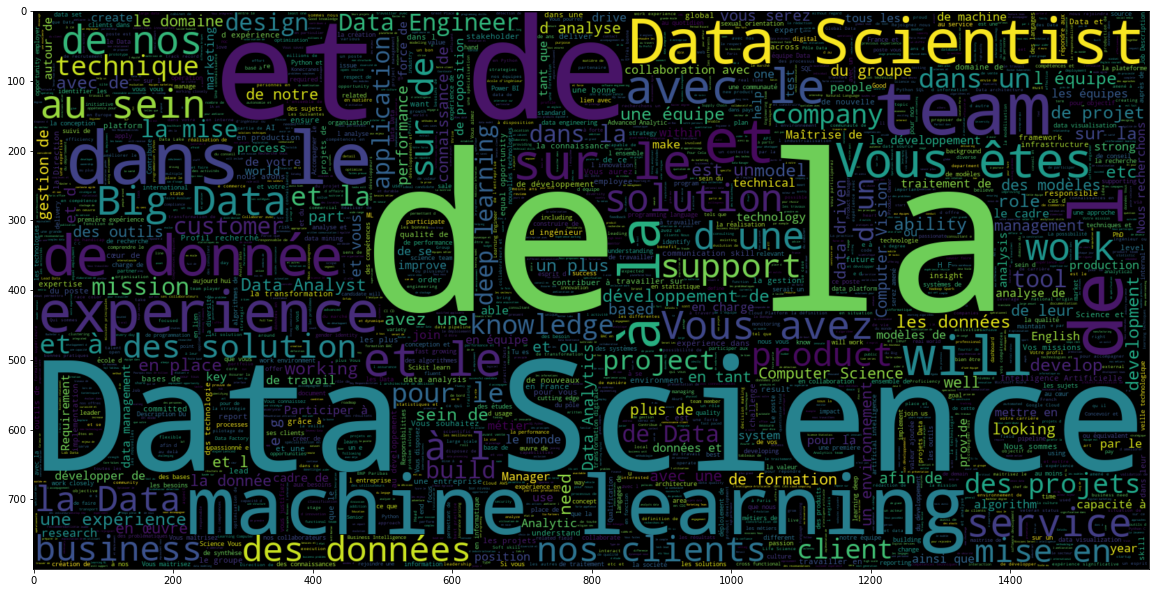

In [873]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data['Description']))
plt.imshow(wc , interpolation = 'bilinear')